## Complete Project Example For Machine Learning

In [ ]:
#### TODO1: Data Description

### 1. About Dataset
This dataset contains an airline passenger satisfaction survey. It aims to identify factors that are highly correlated with passenger satisfaction or dissatisfaction. Additionally, it provides data to predict passenger satisfaction.

#### Features
- **Gender**: Gender of the passengers (Female, Male)
- **Customer Type**: The customer type (Loyal customer, disloyal customer)
- **Age**: The actual age of the passengers
- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Flight distance**: The flight distance of this journey
- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0: Not Applicable; 1-5)
- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient
- **Ease of Online booking**: Satisfaction level of online booking
- **Gate location**: Satisfaction level of Gate location
- **Food and drink**: Satisfaction level of Food and drink
- **Online boarding**: Satisfaction level of online boarding
- **Seat comfort**: Satisfaction level of Seat comfort
- **Inflight entertainment**: Satisfaction level of inflight entertainment
- **On-board service**: Satisfaction level of On-board service
- **Leg room service**: Satisfaction level of Leg room service
- **Baggage handling**: Satisfaction level of baggage handling
- **Check-in service**: Satisfaction level of Check-in service
- **Inflight service**: Satisfaction level of inflight service
- **Cleanliness**: Satisfaction level of Cleanliness
- **Departure Delay in Minutes**: Minutes delayed when departure
- **Arrival Delay in Minutes**: Minutes delayed when arrival
- **Satisfaction**: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

Source: [Airline Passenger Satisfaction Dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv) on Kaggle.

### 2. Exploratory Data Analysis

The initial phase of any data analysis project involves a deep dive into the dataset to understand its nuances, uncover potential issues, and gain insights into the underlying patterns. This section, Exploratory Data Analysis (EDA), will systematically investigate the dataset to lay the groundwork for subsequent modeling and analysis.

Key Steps in EDA

* Data Loading and Inspection:
    * The dataset train.csv will be loaded into a Pandas DataFrame.
    * Initial inspection will reveal the dimensions of the dataset (number of rows and columns).
    * The first few rows will be displayed to get a glimpse of the data's structure and content.

* Data Cleaning and Preprocessing:
    * Handling Missing Values:
        * A thorough assessment of missing values will be conducted. If necessary, appropriate imputation or removal strategies will be applied.
    * Identifying and Addressing Duplicates:
        * Duplicate rows will be detected and removed to ensure data integrity.
    * Data Type Examination:
        * The data types of each column will be scrutinized.
        If needed, conversions to suitable types for further analysis will be performed.

* Univariate Analysis:
    * Numerical Variables:
        * Summary statistics (mean, median, standard deviation, etc.) will be calculated to understand the central tendency and spread of numerical features.
        * Histograms and box plots will be used to visualize the distributions and identify potential outliers.
    * Categorical Variables:
        * The frequency and relative frequency of categories will be computed.
        * Bar plots will be employed to display the distribution of categorical variables.
    * Feature Transformation:
        * Delay Variables: The `Departure Delay in Minutes` and `Arrival Delay in Minutes` variables will be transformed into binary features indicating whether the delay exceeded 30 minutes.

In [ ]:
# import libraries for data processing
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the 'adult_data.csv' dataset into a Pandas DataFrame
data = pd.read_csv('train.csv')
data = data.drop(columns=['Unnamed: 0'])
# Display the number of rows and columns in the dataset
print(data.shape)

(103904, 24)


In [ ]:
#### TODO2: Data size and dimension

In [ ]:
# Display the first 5 rows of the dataset
# This is useful to understand the data's structure, column names, and sample values
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data = data.drop(columns=['id'])
data[data.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ MB


In [ ]:
#### TODO3: Data Information

In [ ]:
data[data.columns[10:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Food and drink              103904 non-null  int64  
 1   Online boarding             103904 non-null  int64  
 2   Seat comfort                103904 non-null  int64  
 3   Inflight entertainment      103904 non-null  int64  
 4   On-board service            103904 non-null  int64  
 5   Leg room service            103904 non-null  int64  
 6   Baggage handling            103904 non-null  int64  
 7   Checkin service             103904 non-null  int64  
 8   Inflight service            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
 12  satisfaction                103904 non-null  object 
dtypes: float64(1),

#### Missing Values
The dataset appears to be largely complete, with most columns having no missing values. However, there is one exception:
- **Arrival Delay in Minutes**: This column has 103594 non-null entries out of a total of 103904, indicating that there are 310 missing values. This could potentially affect any analysis involving this column.

#### Column and Dtype Logic
The dataset contains both numeric and categorical data types:
- **Numeric Columns**: These columns are used for quantitative measurements and include both integers (`int64`) and floating-point numbers (`float64`). The integer columns typically represent counts or levels of satisfaction (on a scale), while the float column represents time delays which may not always be whole numbers.
- **Categorical Columns**: These columns contain qualitative data (`object`) and are used to represent categories such as gender, customer type, type of travel, class, and satisfaction levels.

#### Numeric and Category Columns
- **Numeric Columns**: 19 (18 integers + 1 floating-point)
  - **Integers (int64)**: There are 18 columns containing integer data, which includes measurements like age, flight distance, and various satisfaction levels.
  - **Floating-point (float64)**: There is 1 column containing floating-point data, specifically `Arrival Delay in Minutes`.

- **Categorical Columns**: 5
  - There are 5 columns containing categorical data (`object`), representing categories such as gender, customer type, type of travel, class, and satisfaction levels.

The dataset provides a comprehensive overview of various factors that might influence airline passenger satisfaction, combining both quantitative and qualitative aspects. The primary concern regarding missing values is limited to the `Arrival Delay in Minutes` column, which needs to be addressed during data preprocessing for accurate analysis.

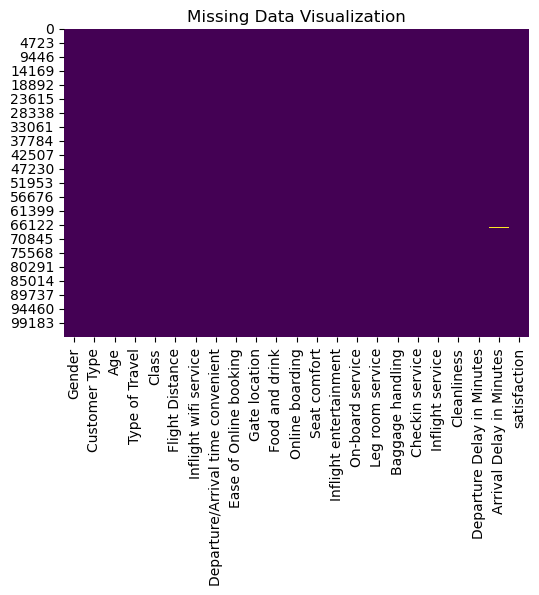

Missing Data Counts:
 Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [ ]:
# Identify missing data
missing_data = data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Print missing data counts
print("Missing Data Counts:\n", missing_data)

In [ ]:
#### TODO4: Missing values

In [ ]:
# Identify duplicate data
duplicate_rows = data[data.duplicated()]

# Display duplicate rows if they exist
if not duplicate_rows.empty:
    print("\nDuplicated Rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicated rows found.")

# Print the count of duplicate rows
print(f"\nNumber of Duplicated Rows: {len(duplicate_rows)}")


No duplicated rows found.

Number of Duplicated Rows: 0


In [ ]:
#### TODO5: Duplicated Values

In [ ]:
# Dropping duplicates and resetting the index
data = data.drop_duplicates().reset_index(drop=True)
print(data.shape)

(103904, 23)


In [ ]:
# Generating summary statistics of the numerical columns
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
#### TODO6: General Evaluation for Numeric Values

In [ ]:
# Select numeric data
numeric_data = data.select_dtypes(include='number').columns
print("numeric_data", numeric_data)
# Select categorical data
categorical_data = data.select_dtypes(exclude='number').columns
print("categorical_data", categorical_data)

numeric_data Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
categorical_data Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [ ]:
for col in categorical_data:
    unique_values = data[col].unique()

    # Print unique values for the current column
    print(f"\nUnique Values in Column '{col}':")
    print(unique_values)

    # Optionally, print the value counts if needed
    # print(data[col].value_counts())


Unique Values in Column 'Gender':
['Male' 'Female']

Unique Values in Column 'Customer Type':
['Loyal Customer' 'disloyal Customer']

Unique Values in Column 'Type of Travel':
['Personal Travel' 'Business travel']

Unique Values in Column 'Class':
['Eco Plus' 'Business' 'Eco']

Unique Values in Column 'satisfaction':
['neutral or dissatisfied' 'satisfied']


In [ ]:
#### TODO7: General Evaluation for Categorical Values

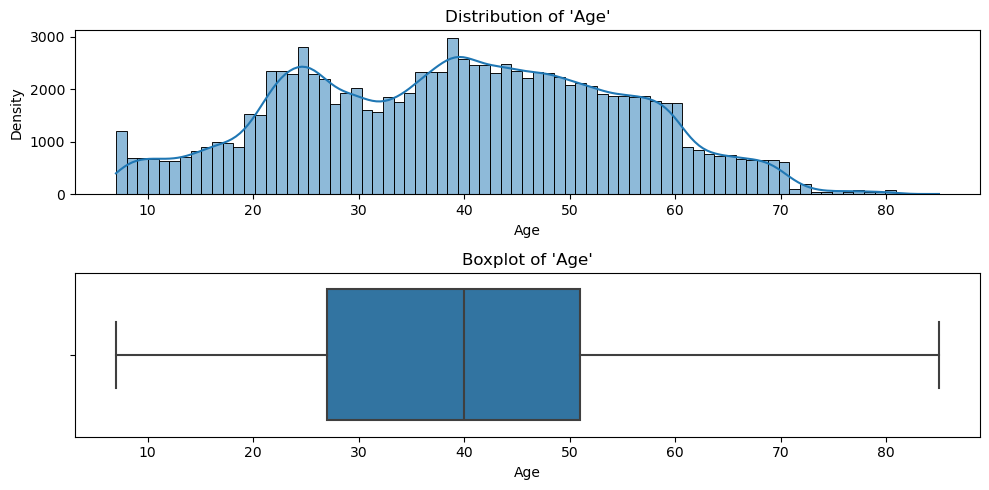

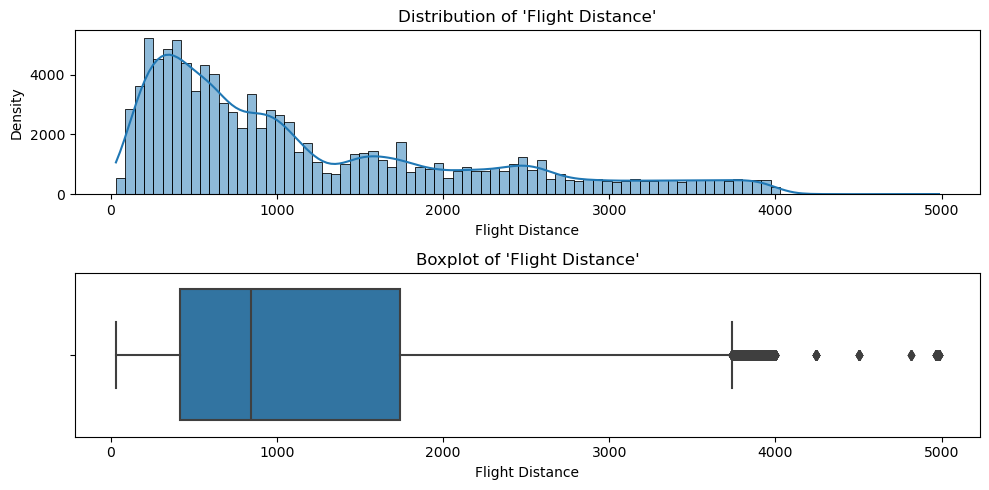

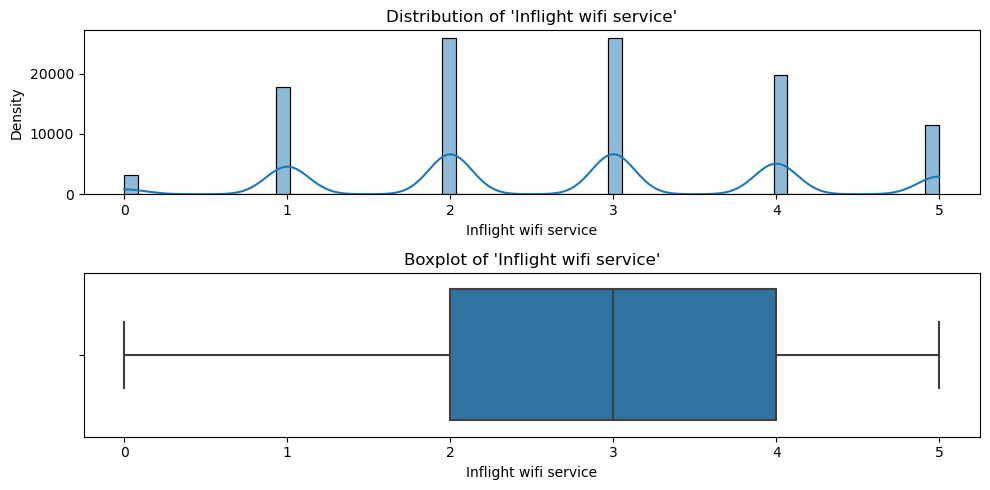

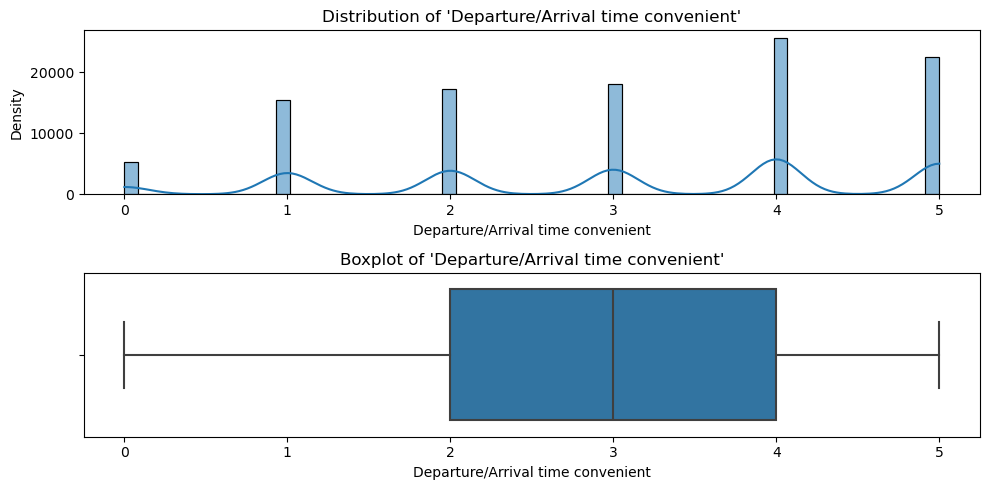

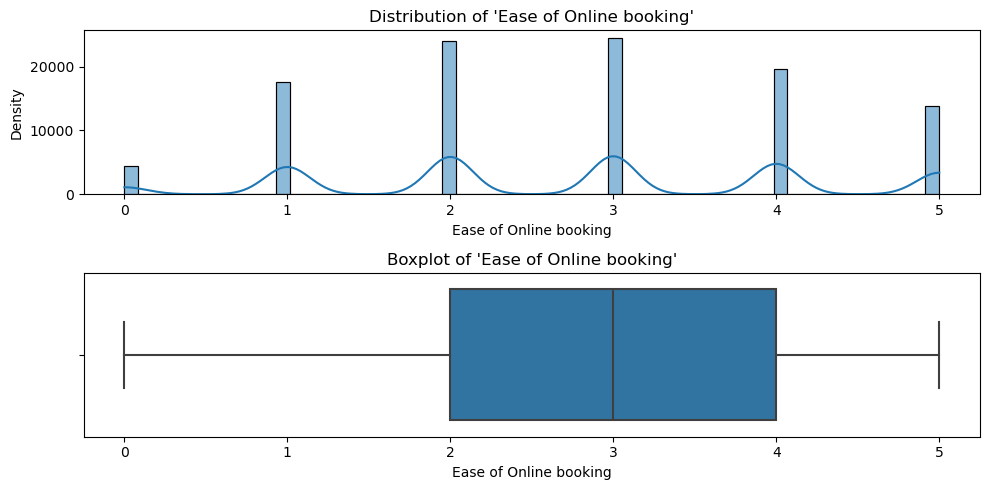

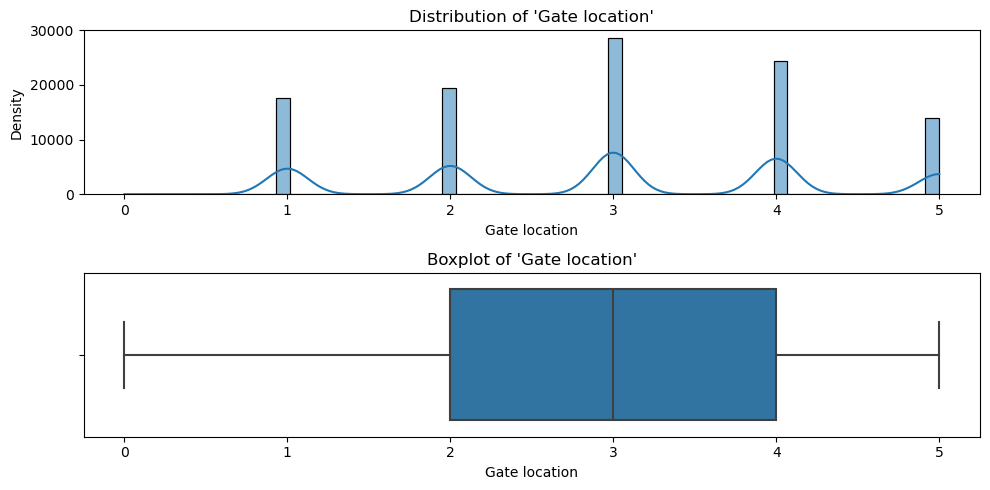

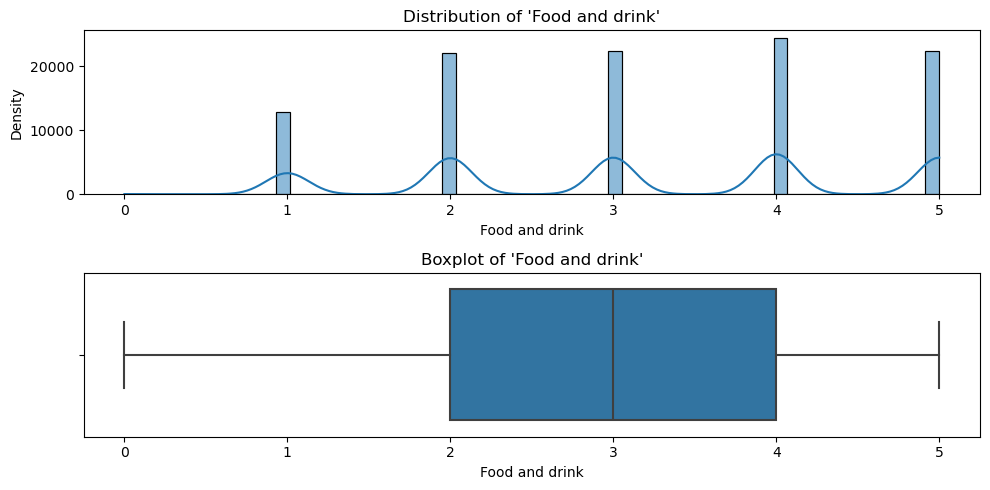

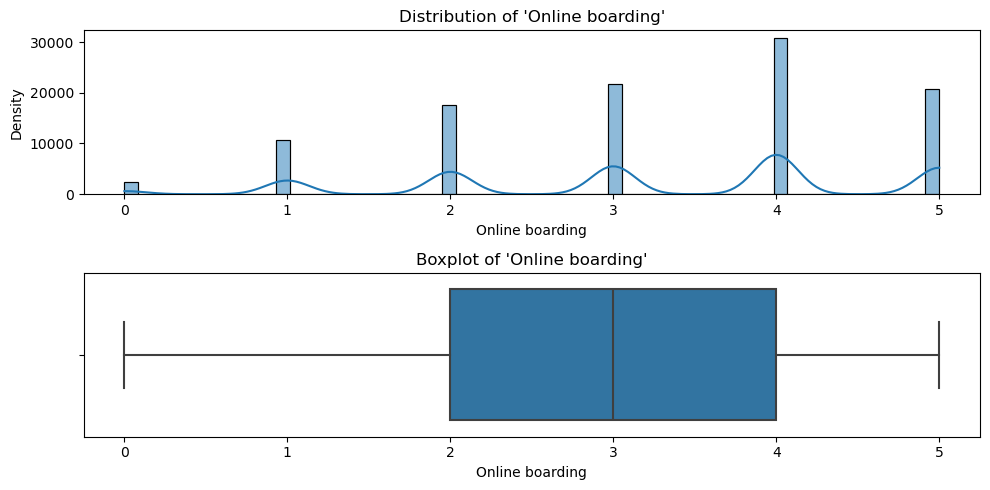

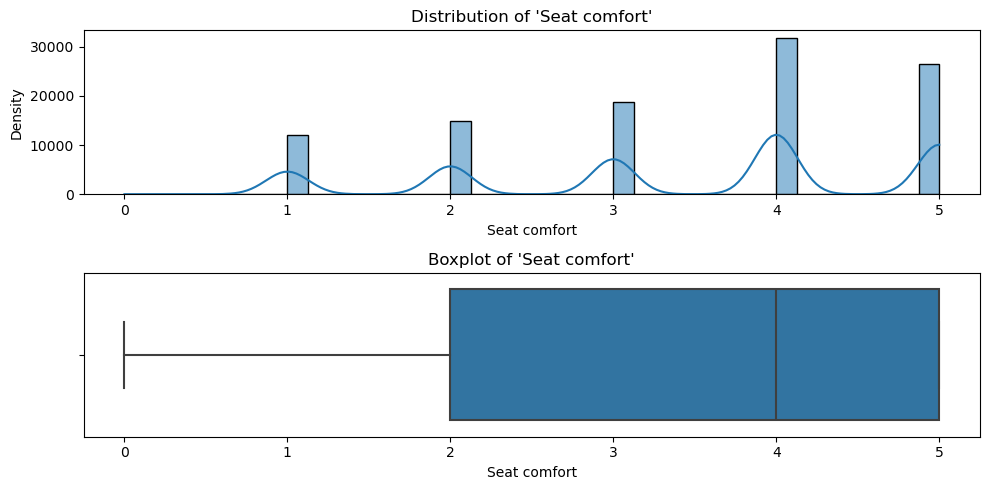

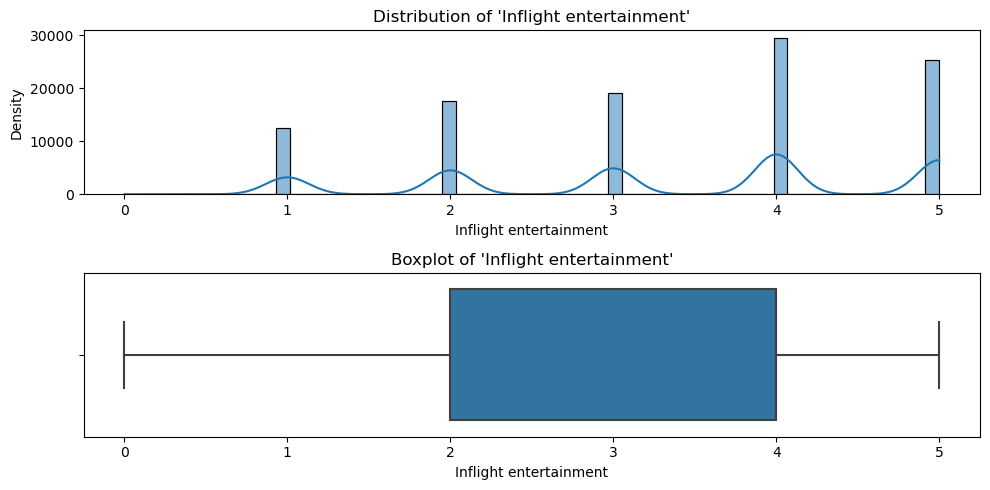

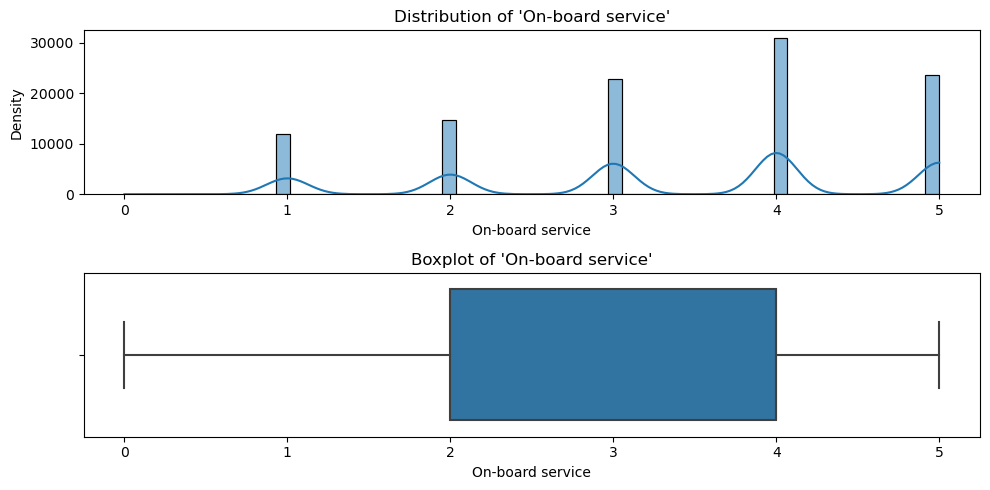

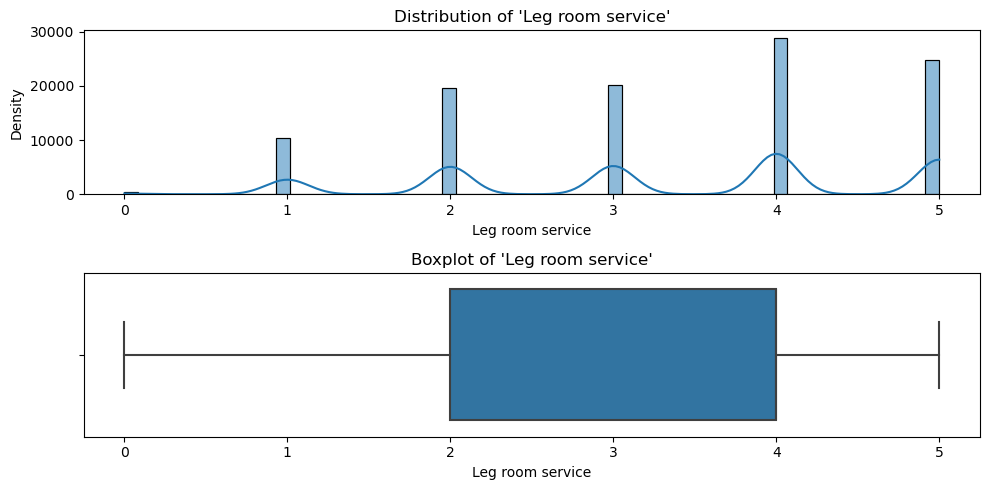

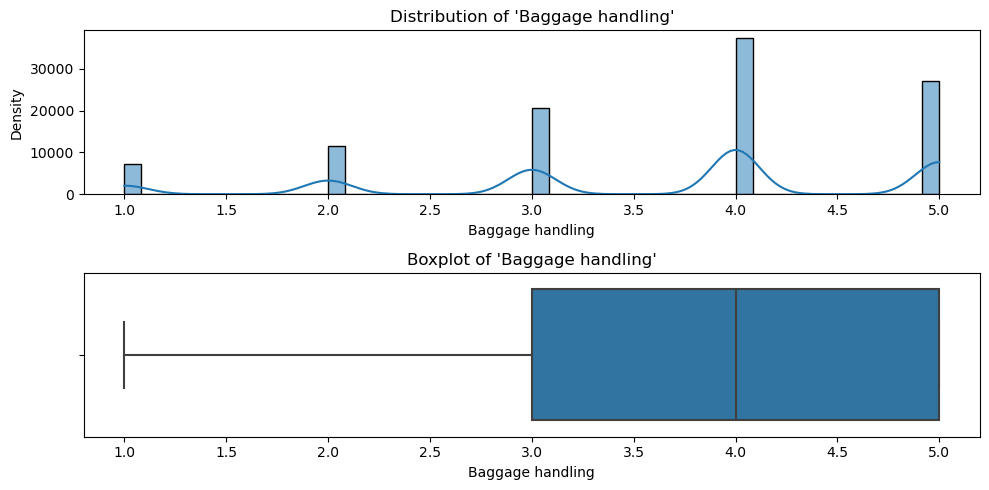

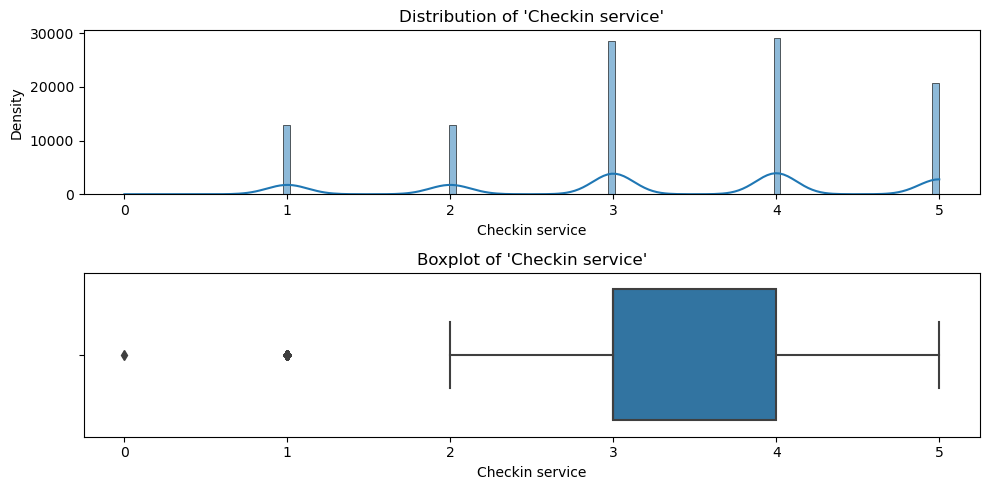

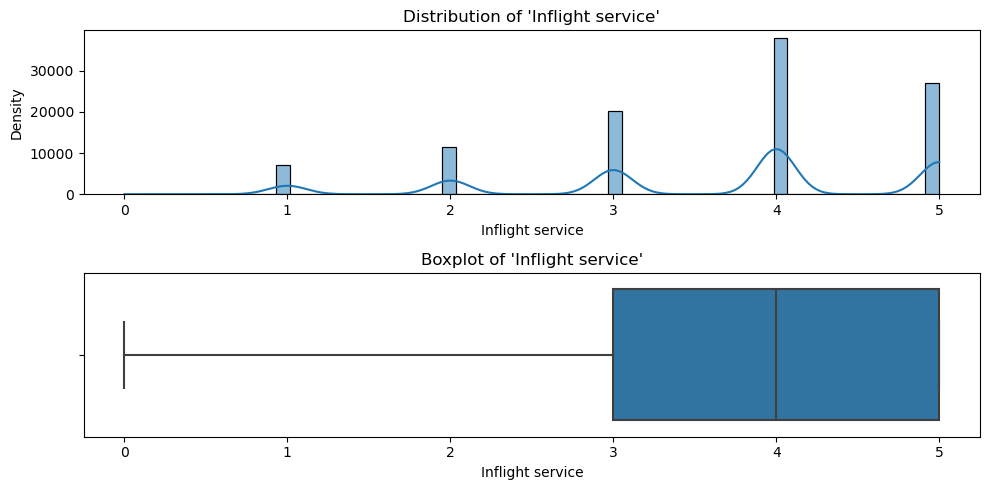

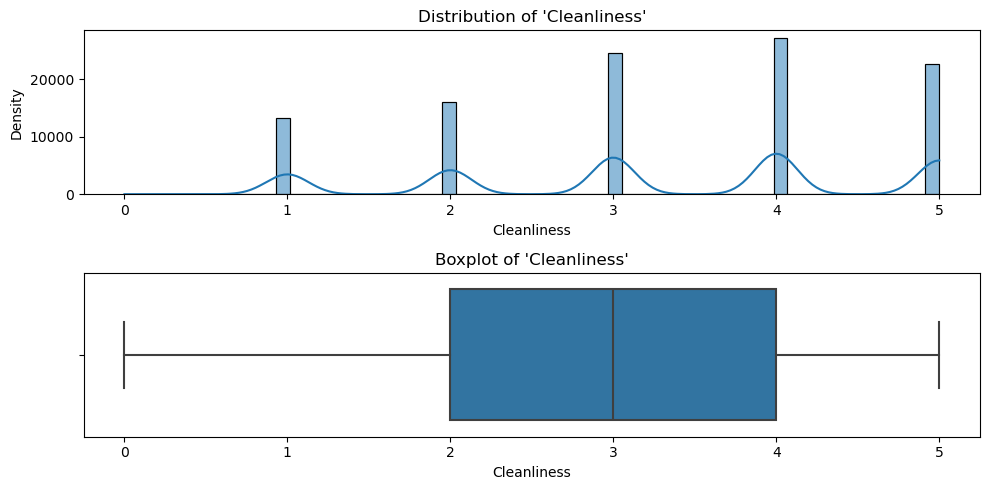

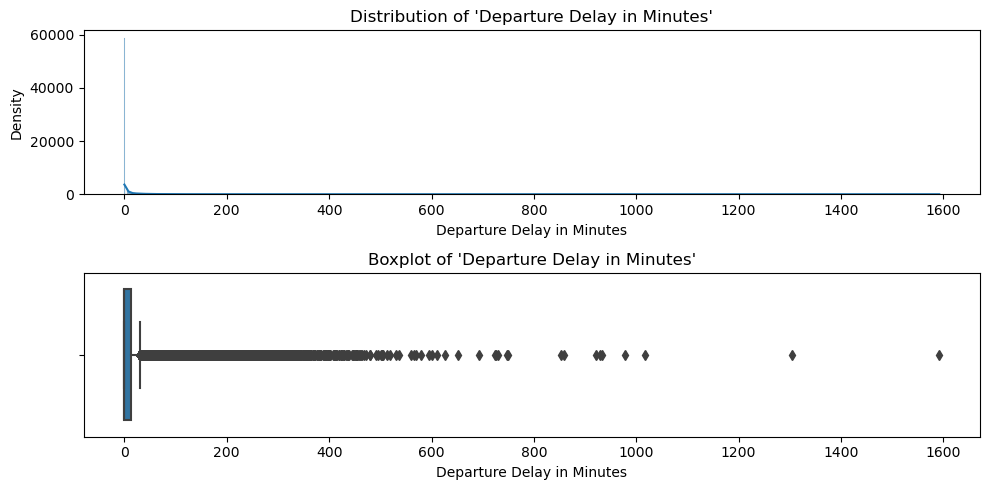

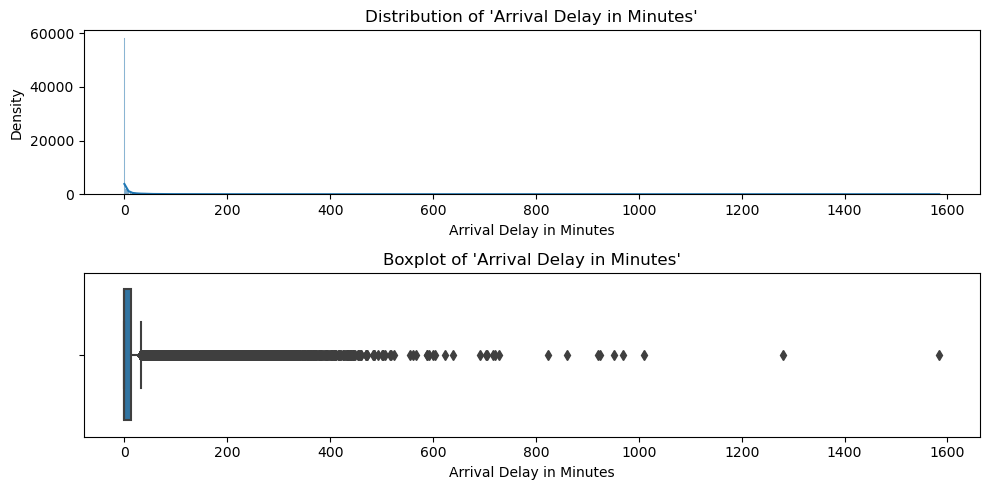

In [ ]:
for col in numeric_data:
    fig, axes = plt.subplots(2, 1, figsize=(10, 5))  # 2 rows, 1 column

    # Distribution Plot (Top Subplot)
    sns.histplot(data=data, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of '{col}'")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Density")

    # Box Plot (Bottom Subplot)
    sns.boxplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot of '{col}'")
    axes[1].set_xlabel(col)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [ ]:
#### TODO8: Univariate Analysis for Numeric Values

To transform the 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' columns into binary values. This conversion aims to categorize flights into two groups: no delay (or delay of 30 minutes or less) and delay of more than 30 minutes.

- **0**: Indicates no delay or a delay of 30 minutes or less.
- **1**: Indicates a delay of more than 30 minutes.


In [ ]:
# Convert values to 0 or 1 based on the delay time
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].apply(lambda x: 1 if x > 30 else 0)
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(lambda x: 1 if x > 30 else 0)

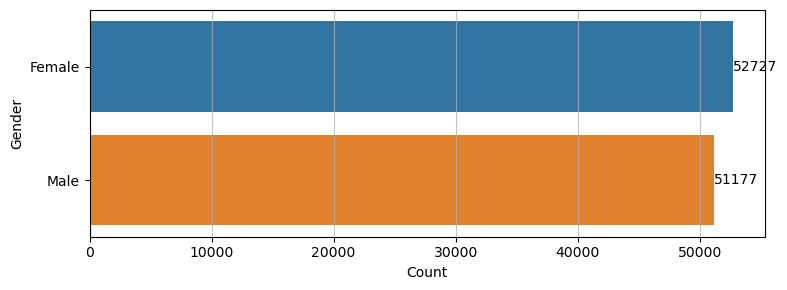

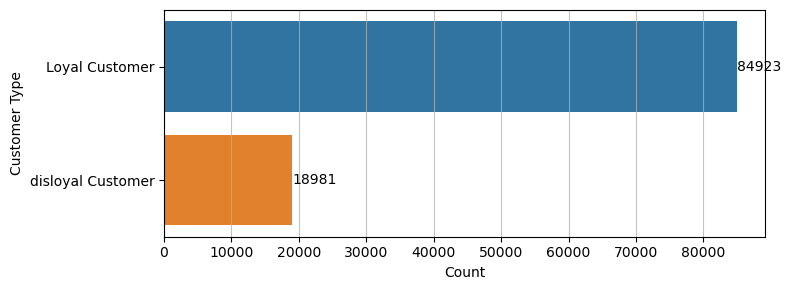

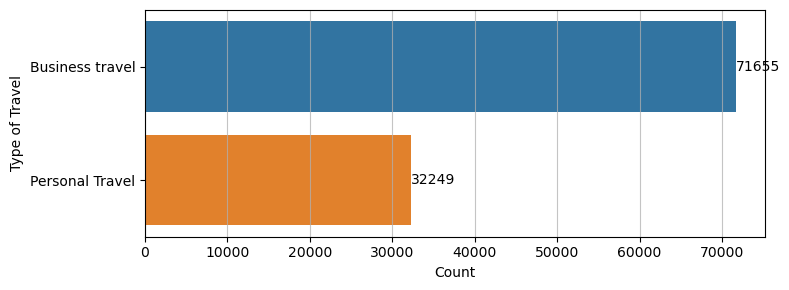

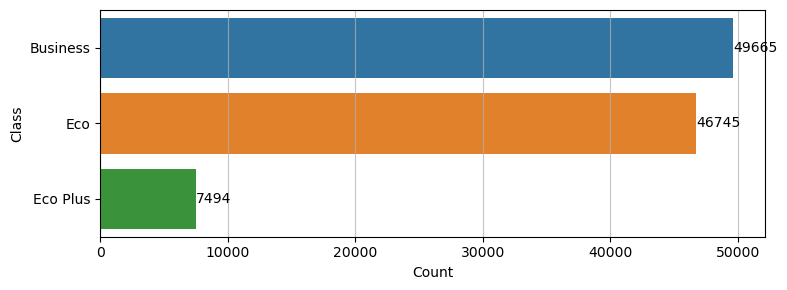

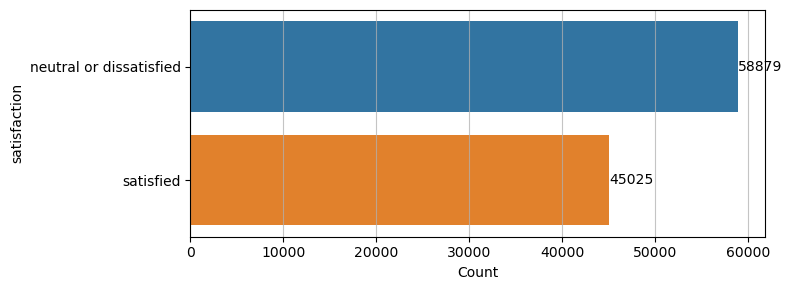

In [ ]:
for col in categorical_data:
    plt.figure(figsize=(8, 3))  # Adjust figsize as needed

    # Calculate value counts
    value_counts = data[col].value_counts()

    # Create the horizontal bar plot
    ax = sns.barplot(x=value_counts.values, y=value_counts.index)

    # Enhance plot appearance
    plt.ylabel(col)
    plt.xlabel("Count")
    # plt.xticks(rotation=45)  # No need for rotation with horizontal bars
    plt.grid(axis='x', alpha=0.75)  # Add horizontal grid

    # Add count annotations
    for index, value in enumerate(value_counts.values):
        ax.text(value, index, f'{value}', va='center')

    # Display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
#### TODO9: Univariate Analysis for Categorical Values

### 3. Feature selection by Filtering Method
This guideline outlines the steps involved in employing filtering methods for feature selection, aiming to reduce dimensionality and mitigate the risk of overfitting while retaining the most relevant predictors.

* Correlation Analysis
    * Calculate the correlation matrix for the numerical features.
    * Visualize the correlation matrix using a heatmap.
    * This step helps to:
        * Identify pairs of features with high correlation.
        * Understand the strength and direction of relationships between variables.

* Threshold-Based Filtering:
    * Set a correlation threshold (e.g., 0.9).
    * Identify features with absolute correlations above this threshold.
    * Decide whether to drop one or both features in each highly correlated pair.
    * Consider the potential for multicollinearity and its impact on model interpretation.

* Feature Removal and Selection:
    * Create a list of features to drop based on the correlation analysis.
    * Remove the identified features from the dataset.
    * Create a final list of selected features for model building.
    * Consider removing additional features that are not relevant to the prediction task based on domain knowledge.


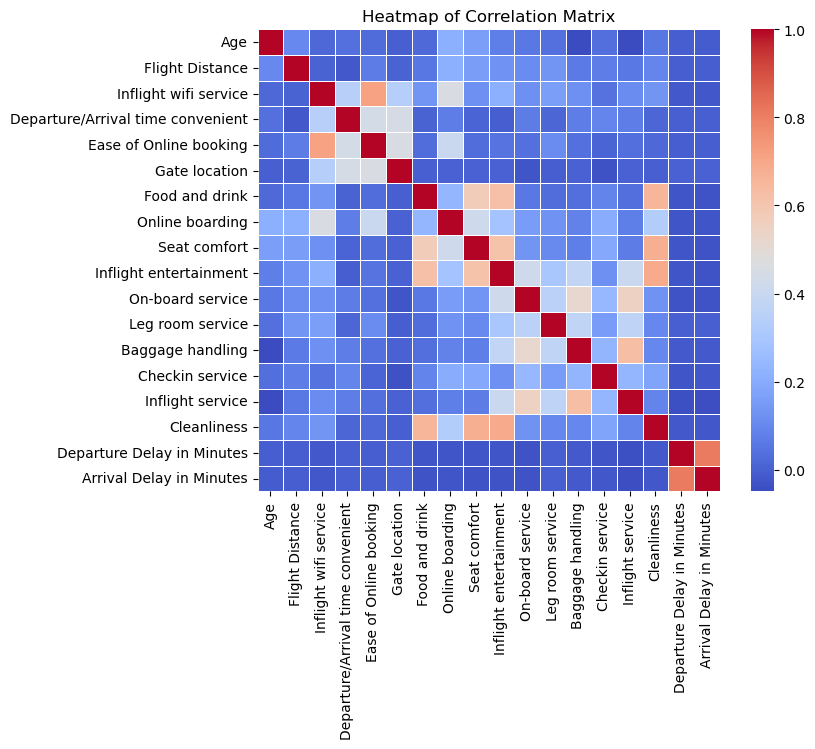

In [ ]:
# Calculate the correlation matrix
corr_matrix = data[numeric_data].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
#### TODO10: Evaluation for Correlated Data

In [ ]:
# Calculate the correlation matrix
corr_matrix = data[numeric_data].corr().abs()

# Create a mask to ignore the upper triangle of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold (0.9)
droped_columns = [column for column in upper.columns if any(upper[column] > 0.8)]

selected_columns = list(set(data.columns) - set(droped_columns))
to_remove = ["id", "satisfaction"]
selected_columns = [col for col in selected_columns if col not in to_remove]

print('droped_columns: ', droped_columns)
print('selected_columns: ', selected_columns)

droped_columns:  ['Arrival Delay in Minutes']
selected_columns:  ['Cleanliness', 'Age', 'Gender', 'Baggage handling', 'Type of Travel', 'Flight Distance', 'Seat comfort', 'Gate location', 'Inflight entertainment', 'Checkin service', 'Food and drink', 'Leg room service', 'Inflight service', 'Ease of Online booking', 'On-board service', 'Customer Type', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Class', 'Online boarding']


In [ ]:
#### TODO11: Evaluation for Feature Selection Using Filtering Method

### 4. Feature selection by Wrapper Method
#### 4.1. Recursive Feature Elimination Method

This guideline specifically focuses on the Recursive Feature Elimination (RFE) method, a widely-used technique that iteratively eliminates features based on their contribution to model performance.

* Model Selection
    * Choose a base model (e.g., Logistic Regression, Decision Tree, Naive Bayes) for feature selection. The choice of model may influence the selected features, so consider the underlying assumptions and characteristics of different algorithms.

* Recursive Feature Elimination (RFE)
    1. Train the base model on the initial set of features.
    2. Rank features based on their importance (e.g., coefficients for linear models, feature importances for tree-based models).
    3. Remove the least important feature.
    4. Retrain the model on the remaining features and re-evaluate its performance.
    5. Repeat steps 3-5 until a desired number of features or a performance threshold is reached.

* Evaluation and Comparison
    * Evaluate the model performance (e.g., accuracy, precision, recall, F1-score) after each feature elimination step.
    * Compare the performance of models with different subsets of features.
    * Select the subset of features that yields the optimal trade-off between model complexity and performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to label encode categorical variables
def label_encode_categorical(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df

# Function to train and evaluate models with feature optimization
def recursive_feature_elimination_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the initial model using all features
    model.fit(X_train_scaled, y_train)

    # Predict and calculate metrics
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Use GradientBoostingClassifier if model doesn't support feature importances
    if hasattr(model, 'feature_importances_'):
        importance_model = model
    else:
        print('Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.')
        importance_model = GradientBoostingClassifier(n_estimators=10, max_depth=4, random_state=10)
        importance_model.fit(X_train_scaled, y_train)

    # Get feature importance
    feature_importances = pd.Series(importance_model.feature_importances_, index=features)
    feature_importances.sort_values(ascending=True, inplace=True)

    # Plot feature importances
    feature_importances.plot.bar(figsize=(20, 6))
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

    # Recursive feature elimination
    features_to_remove = []
    f1_full = f1

    print('Doing recursive feature elimination')
    count = 1

    for feature in feature_importances.index:
        print()
        print(f'Testing feature: {feature} ({count} out of {len(features)})')
        count += 1

        temp_model = type(model)()
        temp_model.fit(X_train.drop(columns=features_to_remove + [feature]), y_train)
        y_pred_temp = temp_model.predict(X_test.drop(columns=features_to_remove + [feature]))
        f1_temp = f1_score(y_test, y_pred_temp, average='macro')

        print(f'New Test F1 Score = {f1_temp}')
        print(f'Full dataset F1 Score = {f1_full}')

        diff_f1 = f1_full - f1_temp

        if diff_f1 >= tol:
            print(f'Drop in F1 Score = {diff_f1}')
            print(f'Keep: {feature}')
        else:
            print(f'Drop in F1 Score = {diff_f1}')
            print(f'Remove: {feature}')
            f1_full = f1_temp
            features_to_remove.append(feature)

    print()
    print('-'*60)
    print(f'Total features to remove: {len(features_to_remove)}')

    features_to_keep = [feature for feature in feature_importances.index if feature not in features_to_remove]
    print(f'Total features to keep: {len(features_to_keep)}')

    # Retrain the model with optimized features
    model.fit(X_train[features_to_keep], y_train)
    y_pred_optimized = model.predict(X_test[features_to_keep])

    # Calculate and print optimized metrics
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    precision_optimized = precision_score(y_test, y_pred_optimized, average='macro')
    recall_optimized = recall_score(y_test, y_pred_optimized, average='macro')
    f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')
    print('-'*60)
    # Print initial metrics
    print(f'Initial Model Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-'*60)
    # Print optimal metrics
    print(f'Optimized Model Performance:')
    print(f'Accuracy: {accuracy_optimized:.4f}')
    print(f'Precision: {precision_optimized:.4f}')
    print(f'Recall: {recall_optimized:.4f}')
    print(f'F1 Score: {f1_optimized:.4f}')

Evaluating model: LogisticRegression
Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.


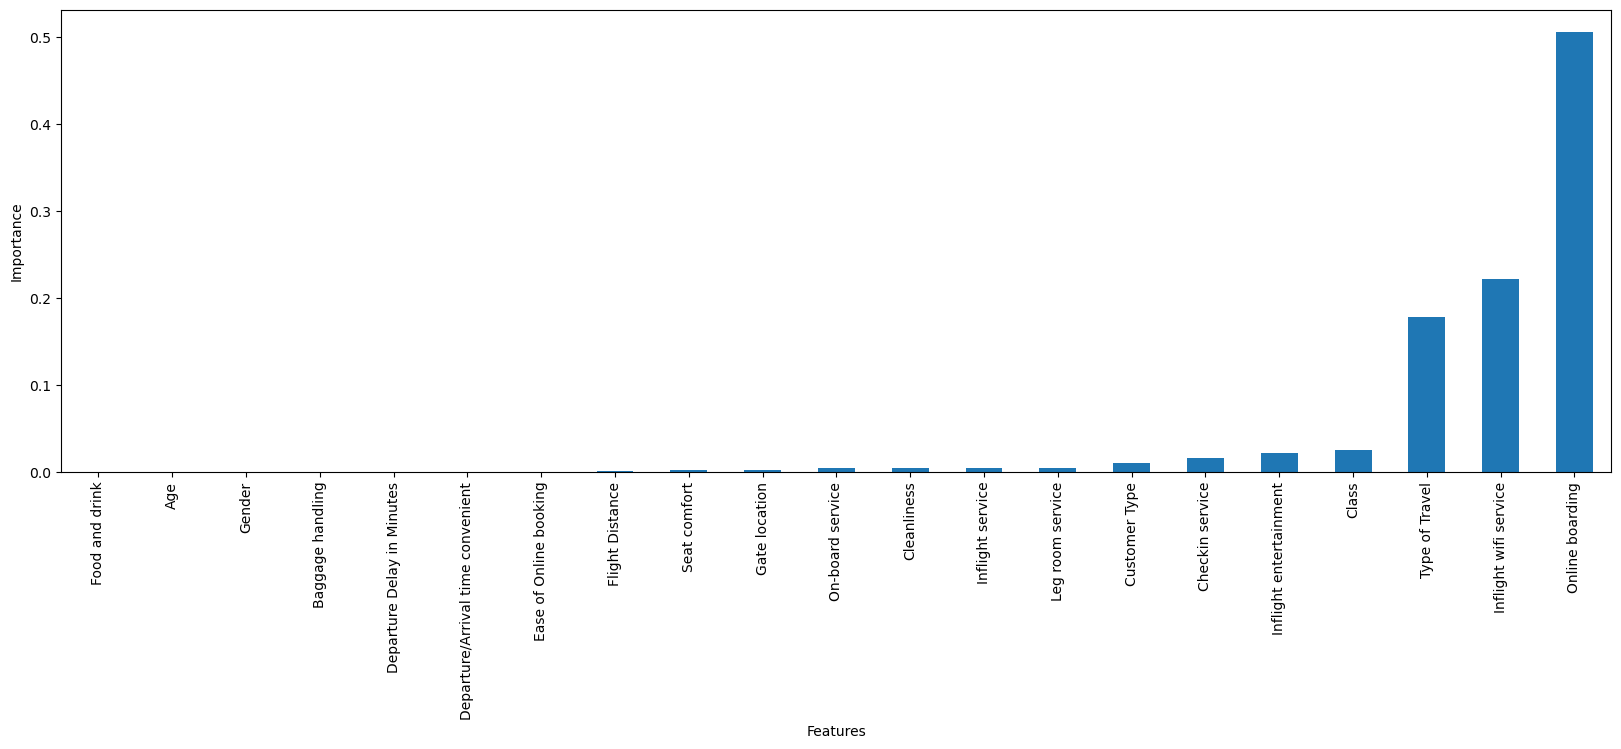

Doing recursive feature elimination

Testing feature: Food and drink (1 out of 21)
New Test F1 Score = 0.8474891378806632
Full dataset F1 Score = 0.8731494534550288
Drop in F1 Score = 0.025660315574365655
Keep: Food and drink

Testing feature: Age (2 out of 21)
New Test F1 Score = 0.845251798447261
Full dataset F1 Score = 0.8731494534550288
Drop in F1 Score = 0.027897655007767863
Keep: Age

Testing feature: Gender (3 out of 21)
New Test F1 Score = 0.8353283835096668
Full dataset F1 Score = 0.8731494534550288
Drop in F1 Score = 0.03782106994536205
Keep: Gender

Testing feature: Baggage handling (4 out of 21)
New Test F1 Score = 0.836449708043649
Full dataset F1 Score = 0.8731494534550288
Drop in F1 Score = 0.03669974541137977
Keep: Baggage handling

Testing feature: Departure Delay in Minutes (5 out of 21)
New Test F1 Score = 0.8414777116649399
Full dataset F1 Score = 0.8731494534550288
Drop in F1 Score = 0.031671741790088914
Keep: Departure Delay in Minutes

Testing feature: Departure/

In [ ]:
model = LogisticRegression(max_iter=200, random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

In [ ]:
#### TODO12: Evaluation for Recursive Feature Elimination on Linear Regression

Evaluating model: DecisionTreeClassifier


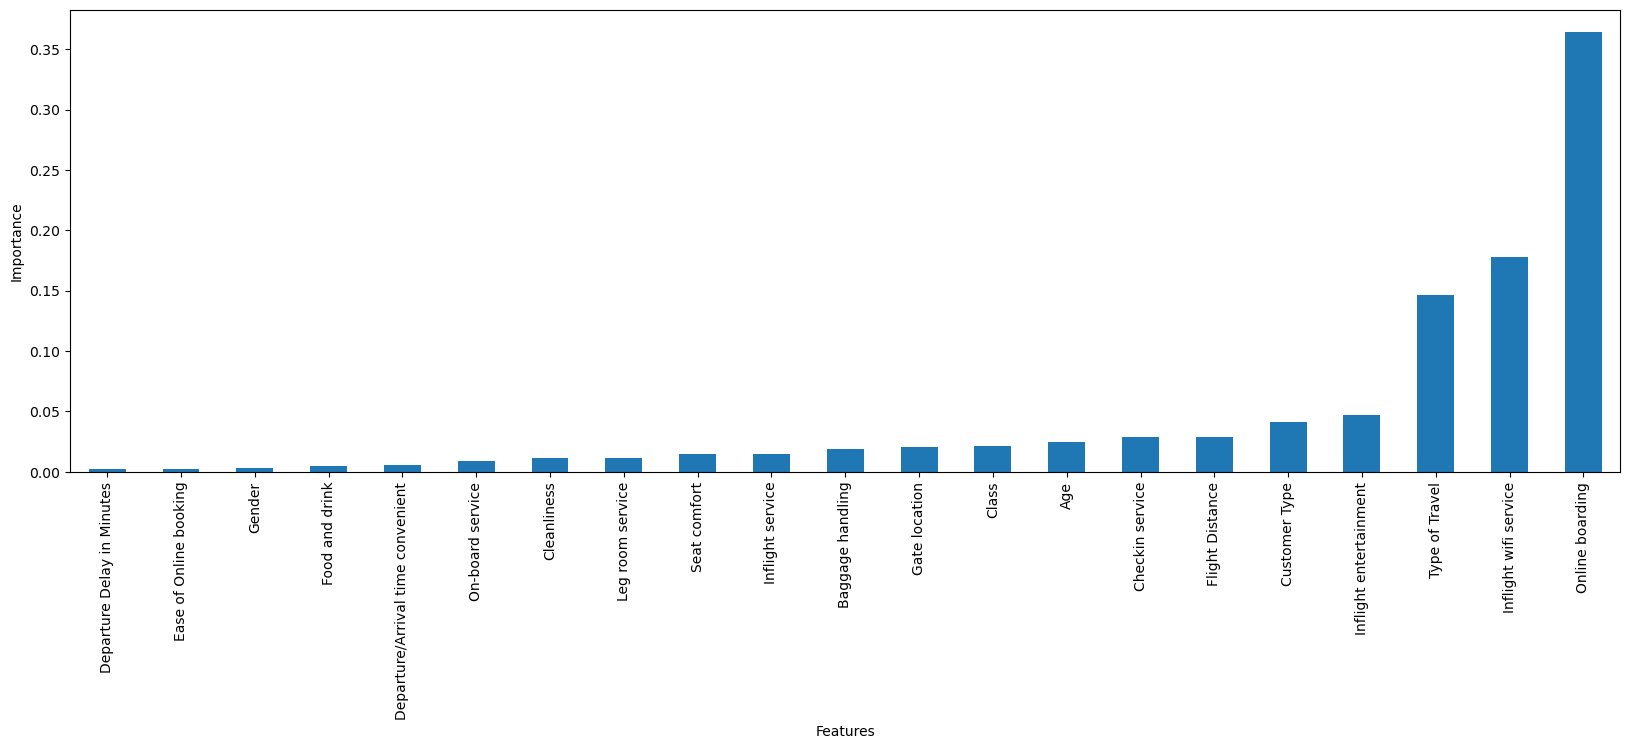

Doing recursive feature elimination

Testing feature: Departure Delay in Minutes (1 out of 21)
New Test F1 Score = 0.9445975479038048
Full dataset F1 Score = 0.9433655909726913
Drop in F1 Score = -0.0012319569311134426
Remove: Departure Delay in Minutes

Testing feature: Ease of Online booking (2 out of 21)
New Test F1 Score = 0.9448895069411287
Full dataset F1 Score = 0.9445975479038048
Drop in F1 Score = -0.00029195903732393
Remove: Ease of Online booking

Testing feature: Gender (3 out of 21)
New Test F1 Score = 0.9441236680859815
Full dataset F1 Score = 0.9448895069411287
Drop in F1 Score = 0.0007658388551472495
Keep: Gender

Testing feature: Food and drink (4 out of 21)
New Test F1 Score = 0.9439273796323296
Full dataset F1 Score = 0.9448895069411287
Drop in F1 Score = 0.0009621273087990767
Keep: Food and drink

Testing feature: Departure/Arrival time convenient (5 out of 21)
New Test F1 Score = 0.9446753078678412
Full dataset F1 Score = 0.9448895069411287
Drop in F1 Score = 0.000

In [ ]:
model = DecisionTreeClassifier(random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

In [ ]:
#### TODO13: Evaluation for Recursive Feature Elimination on Dicicion Tree

Evaluating model: GaussianNB
Feature importance not available for this model. Using GradientBoostingClassifier for feature importance.


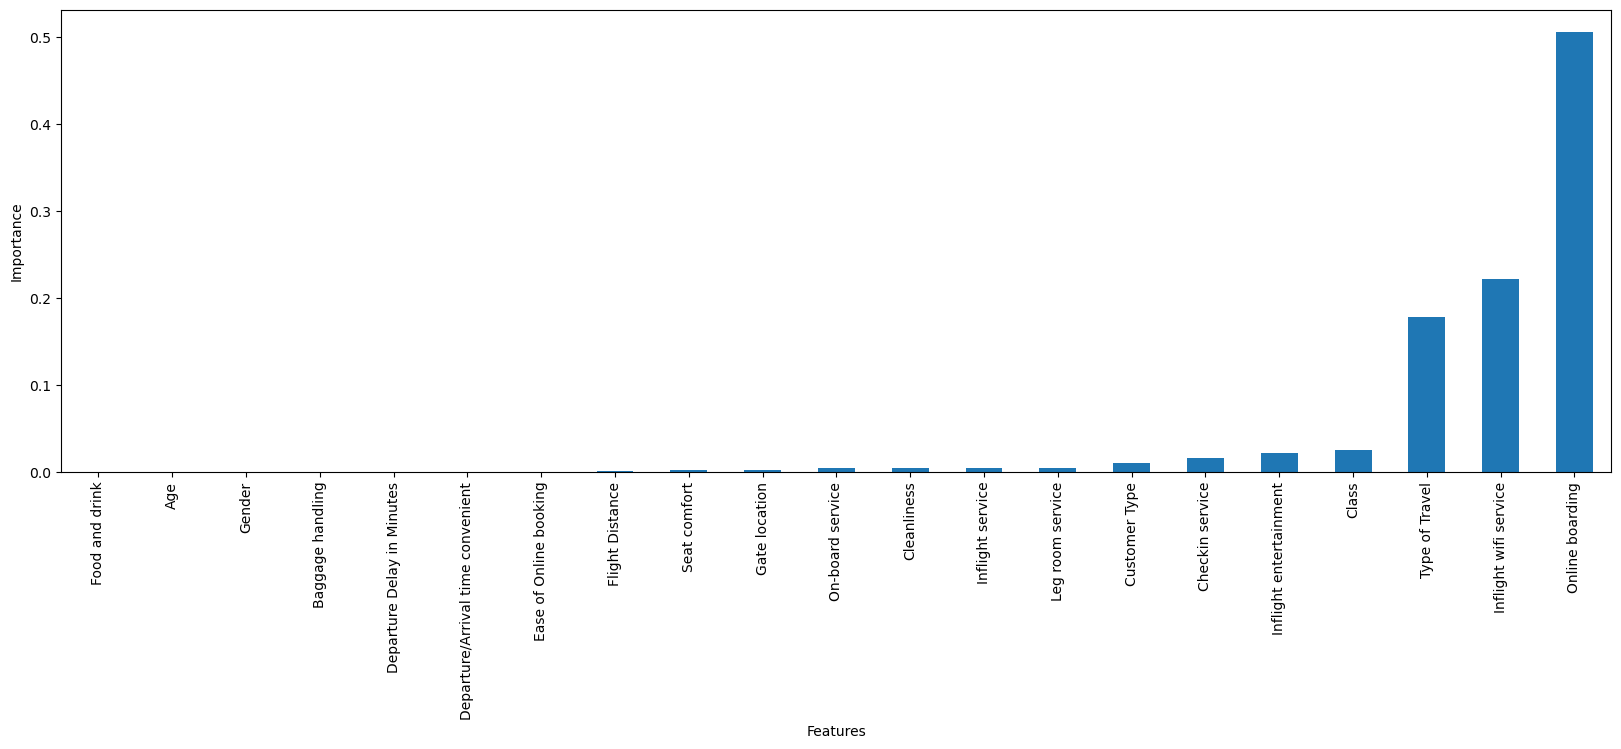

Doing recursive feature elimination

Testing feature: Food and drink (1 out of 21)
New Test F1 Score = 0.8657779204247924
Full dataset F1 Score = 0.8643562339630941
Drop in F1 Score = -0.0014216864616982683
Remove: Food and drink

Testing feature: Age (2 out of 21)
New Test F1 Score = 0.8660514784909951
Full dataset F1 Score = 0.8657779204247924
Drop in F1 Score = -0.00027355806620266154
Remove: Age

Testing feature: Gender (3 out of 21)
New Test F1 Score = 0.8661513614715715
Full dataset F1 Score = 0.8660514784909951
Drop in F1 Score = -9.988298057639344e-05
Remove: Gender

Testing feature: Baggage handling (4 out of 21)
New Test F1 Score = 0.8675812084378214
Full dataset F1 Score = 0.8661513614715715
Drop in F1 Score = -0.0014298469662499258
Remove: Baggage handling

Testing feature: Departure Delay in Minutes (5 out of 21)
New Test F1 Score = 0.8667697872593019
Full dataset F1 Score = 0.8675812084378214
Drop in F1 Score = 0.0008114211785195113
Keep: Departure Delay in Minutes

Testi

In [ ]:
model = GaussianNB()

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_elimination_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

In [ ]:
#### TODO14: Evaluation for Recursive Feature Elimination on Naive Bayes

#### 4.2. Recursive Feature Addition Method
This guideline outlines the Recursive Feature Addition (RFA) method, a technique that iteratively adds features based on their incremental improvement to model performance.

* *Model Selection:
    * As with RFE, choose a suitable base model for feature selection. The choice of model will influence which features are considered valuable additions.

* Recursive Feature Addition (RFA):
    1. Begin with a model trained on a single feature (typically chosen based on initial importance or domain knowledge).
    2. Evaluate the model's performance (e.g., F1-score).
    3. For each remaining feature:
        * Add it to the current feature set.
        * Retrain the model and re-evaluate its performance.
        * Record the improvement in performance compared to the previous iteration.
    4. Select the feature that provides the largest improvement and permanently add it to the feature set.
    5. Repeat steps 3-4 until adding any remaining feature does not lead to a significant improvement (defined by a tolerance threshold).

* Evaluation and Comparison:
    * After each feature addition step, assess the model performance.
    * Compare the performance of models with different numbers of added features.
    * Choose the feature set that maximizes performance while avoiding overfitting due to excessive feature inclusion.

In [ ]:
# Function to train and evaluate models with feature addition
def recursive_feature_addition_evaluation(model, df, features, target, tol=0.0005):
    # Label encode categorical variables
    df = label_encode_categorical(df)

    # Split data into features and target
    X = df[features]
    y = df[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Start with the first feature
    initial_features = [features[0]]
    model.fit(X_train_scaled[:, [0]], y_train)
    y_pred = model.predict(X_test_scaled[:, [0]])
    f1_full = f1_score(y_test, y_pred, average='macro')

    # Print initial metrics
    print('-'*60)
    print(f'Initial Model Performance with One Feature ({features[0]}):')
    print(f'F1 Score: {f1_full:.4f}')
    print('-'*60)

    # Recursive feature addition
    features_to_add = [features[0]]
    remaining_features = features[1:]

    print('Doing recursive feature addition')

    while remaining_features:
        feature_scores = []

        for feature in remaining_features:
            current_features_indices = [features.index(f) for f in features_to_add + [feature]]

            model.fit(X_train_scaled[:, current_features_indices], y_train)
            y_pred_temp = model.predict(X_test_scaled[:, current_features_indices])
            f1_temp = f1_score(y_test, y_pred_temp, average='macro')

            feature_scores.append((f1_temp, feature))

        feature_scores.sort(reverse=True)
        best_f1, best_feature = feature_scores[0]

        if best_f1 - f1_full >= tol:
            print(f'Adding feature: {best_feature}')
            features_to_add.append(best_feature)
            remaining_features.remove(best_feature)
            f1_full = best_f1
        else:
            print('No more features to add that improve performance by at least the tolerance threshold.')
            break

        print(f'New F1 Score with added feature(s): {f1_full:.4f}')

    print()
    print('-'*60)
    print(f'Total features added: {len(features_to_add)}')
    print(f'Features added: {features_to_add}')

    # Retrain the model with the selected features
    final_features_indices = [features.index(f) for f in features_to_add]
    model.fit(X_train_scaled[:, final_features_indices], y_train)
    y_pred_optimized = model.predict(X_test_scaled[:, final_features_indices])

    # Calculate and print optimized metrics
    accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
    precision_optimized = precision_score(y_test, y_pred_optimized, average='macro')
    recall_optimized = recall_score(y_test, y_pred_optimized, average='macro')
    f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')
    print('-'*60)
    print(f'Optimized Model Performance with Selected Features:')
    print(f'Accuracy:  {accuracy_optimized:.4f}')
    print(f'Precision: {precision_optimized:.4f}')
    print(f'Recall:    {recall_optimized:.4f}')
    print(f'F1 Score:  {f1_optimized:.4f}')
    print('-'*60)

In [ ]:
model = LogisticRegression(max_iter=200, random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: LogisticRegression
------------------------------------------------------------
Initial Model Performance with One Feature (Cleanliness):
F1 Score: 0.6301
------------------------------------------------------------
Doing recursive feature addition
Adding feature: Online boarding
New F1 Score with added feature(s): 0.8047
Adding feature: Type of Travel
New F1 Score with added feature(s): 0.8213
Adding feature: On-board service
New F1 Score with added feature(s): 0.8342
Adding feature: Customer Type
New F1 Score with added feature(s): 0.8483
Adding feature: Inflight wifi service
New F1 Score with added feature(s): 0.8553
Adding feature: Baggage handling
New F1 Score with added feature(s): 0.8594
Adding feature: Checkin service
New F1 Score with added feature(s): 0.8636
Adding feature: Leg room service
New F1 Score with added feature(s): 0.8665
Adding feature: Class
New F1 Score with added feature(s): 0.8694
Adding feature: Departure/Arrival time convenient
New F1 Score

In [ ]:
#### TODO15: Evaluation for Recursive Feature Addition on Linear Regression

In [ ]:
model = DecisionTreeClassifier(random_state=42)

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: DecisionTreeClassifier
------------------------------------------------------------
Initial Model Performance with One Feature (Cleanliness):
F1 Score: 0.6301
------------------------------------------------------------
Doing recursive feature addition
Adding feature: Online boarding
New F1 Score with added feature(s): 0.8087
Adding feature: Type of Travel
New F1 Score with added feature(s): 0.8548
Adding feature: Inflight wifi service
New F1 Score with added feature(s): 0.9032
Adding feature: Inflight entertainment
New F1 Score with added feature(s): 0.9259
Adding feature: Gate location
New F1 Score with added feature(s): 0.9338
Adding feature: Class
New F1 Score with added feature(s): 0.9408
Adding feature: Customer Type
New F1 Score with added feature(s): 0.9461
Adding feature: Baggage handling
New F1 Score with added feature(s): 0.9474
No more features to add that improve performance by at least the tolerance threshold.

-------------------------------------------

In [ ]:
#### TODO15: Evaluation for Recursive Feature Addition on Decision Tree

In [ ]:
model = GaussianNB()

print(f"Evaluating model: {type(model).__name__}")
recursive_feature_addition_evaluation(model, data, selected_columns, data.columns[-1])
print("\n")

Evaluating model: GaussianNB
------------------------------------------------------------
Initial Model Performance with One Feature (Cleanliness):
F1 Score: 0.6301
------------------------------------------------------------
Doing recursive feature addition
Adding feature: Online boarding
New F1 Score with added feature(s): 0.7823
Adding feature: Inflight wifi service
New F1 Score with added feature(s): 0.8079
Adding feature: Leg room service
New F1 Score with added feature(s): 0.8249
Adding feature: Type of Travel
New F1 Score with added feature(s): 0.8463
Adding feature: Customer Type
New F1 Score with added feature(s): 0.8625
Adding feature: On-board service
New F1 Score with added feature(s): 0.8733
Adding feature: Checkin service
New F1 Score with added feature(s): 0.8793
Adding feature: Inflight service
New F1 Score with added feature(s): 0.8807
No more features to add that improve performance by at least the tolerance threshold.

------------------------------------------------

In [ ]:
#### TODO16: Evaluation for Recursive Feature Addition on Naive Bayes

### 5. Feature Selection Using Embedded-Lasso Method
This guideline focuses on the Lasso (Least Absolute Shrinkage and Selection Operator) method, a linear regression technique that simultaneously performs feature selection and regularization.

* Model Selection
    * The Lasso method is inherently embedded in linear models (e.g., Logistic Regression for classification). Choose a suitable linear model for your prediction task.

* Regularization with L1 Penalty (Lasso)
    * Train the linear model with an L1 regularization penalty. This penalty encourages sparsity in the model coefficients, effectively shrinking some coefficients to zero.
    * Features with zero coefficients are considered unimportant and can be eliminated.

* Feature Selection
    * Utilize the SelectFromModel function in scikit-learn to automatically select features based on their non-zero coefficients in the trained Lasso model.

* Evaluation
    * Train a new model (of the same type as the original) using only the selected features.
    * Evaluate the model's performance to assess the impact of feature selection on predictive accuracy.


In [ ]:
from sklearn.feature_selection import SelectFromModel

X = data[selected_columns]
y = data['satisfaction']
feature_names = selected_columns

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Classification with all features
clf_all_features = LogisticRegression(max_iter=1000, random_state=42)
clf_all_features.fit(X_train, y_train)
y_pred_all = clf_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy with all features: {accuracy_all:.4f}')
print('-'*60)
# 2. Feature selection using L1 regularization (Lasso)
clf_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
clf_l1.fit(X_train, y_train)

# Select features
model_l1 = SelectFromModel(clf_l1, prefit=True)
X_train_l1 = model_l1.transform(X_train)
X_test_l1 = model_l1.transform(X_test)
selected_features_l1 = model_l1.get_support(indices=True)
print(f'Selected {len(selected_features_l1)} features by L1: {np.array(feature_names)[selected_features_l1]}')

# Classification with L1 selected features
clf_l1_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l1_selected.fit(X_train_l1, y_train)
y_pred_l1 = clf_l1_selected.predict(X_test_l1)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Accuracy with L1 selected features: {accuracy_l1:.4f}')
print('-'*60)

# 3. Feature selection using L2 regularization (Ridge)
clf_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
clf_l2.fit(X_train, y_train)

# Select features
model_l2 = SelectFromModel(clf_l2, prefit=True)
X_train_l2 = model_l2.transform(X_train)
X_test_l2 = model_l2.transform(X_test)
selected_features_l2 = model_l2.get_support(indices=True)
print(f'Selected {len(selected_features_l2)} features by L2: {np.array(feature_names)[selected_features_l2]}')

# Classification with L2 selected features
clf_l2_selected = LogisticRegression(max_iter=1000, random_state=42)
clf_l2_selected.fit(X_train_l2, y_train)
y_pred_l2 = clf_l2_selected.predict(X_test_l2)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy with L2 selected features: {accuracy_l2:.4f}')

Accuracy with all features: 0.8743
------------------------------------------------------------
Selected 20 features by L1: ['Cleanliness' 'Age' 'Gender' 'Baggage handling' 'Type of Travel'
 'Seat comfort' 'Gate location' 'Inflight entertainment' 'Checkin service'
 'Food and drink' 'Leg room service' 'Inflight service'
 'Ease of Online booking' 'On-board service' 'Customer Type'
 'Inflight wifi service' 'Departure/Arrival time convenient'
 'Departure Delay in Minutes' 'Class' 'Online boarding']
Accuracy with L1 selected features: 0.8758
------------------------------------------------------------
Selected 5 features by L2: ['Type of Travel' 'Customer Type' 'Departure Delay in Minutes' 'Class'
 'Online boarding']
Accuracy with L2 selected features: 0.8200


In [ ]:
#### TODO16: Evaluation for Feature Selection using Embedding Method

### 6. Conclusion
By harnessing the power of correlation analysis, recursive feature elimination, recursive feature addition, and the Lasso regularization technique, we successfully navigated the complexities of high-dimensional data. We discovered that a careful balance between feature reduction and model complexity is key to achieving predictive accuracy without sacrificing interpretability.

The insights gained from this feature selection process serve as a crucial foundation for subsequent model development. Armed with a refined set of informative features, we are well-positioned to construct robust and parsimonious models that can effectively address the challenges of our specific prediction task.


In [ ]:
#### TODO17: Overall Conclusion